In [19]:
import robotdatapy as rdp
from robotdatapy import data
from robotdatapy import transform

## Bag file location and other parameters

In [20]:
bag_file_path = "/media/masonbp/T71/data/2024_07_highbay_overhead/exp1/runB.bag"
pose_topic = "/overhead_cam/world"
vicon_body_frame = "overhead_cam"
cam_frame = "overhead_cam/d455_color_optical_frame"

# data params
time_tol = 0.5

## Load PoseData class

In [21]:
T_viconbody_cam = rdp.data.PoseData.static_tf_from_bag(
    path=bag_file_path,
    parent_frame=vicon_body_frame,
    child_frame=cam_frame,
)

pose_data = rdp.data.PoseData.from_bag(
    path=bag_file_path,
    topic=pose_topic,
    time_tol=time_tol,
    T_postmultiply=T_viconbody_cam
)

## Access Pose Data

In [23]:
print(f"initial pose transform: \n{pose_data.pose(pose_data.t0)}")
print(f"in xyz, rpy: {rdp.transform.transform_2_xyzrpy(pose_data.pose(pose_data.t0), degrees=True)}")

initial pose transform: 
[[-0.64648781 -0.75830455  0.08383147 -4.45843741]
 [-0.76224181  0.63735148 -0.11300666  2.63494882]
 [ 0.03226335 -0.13695729 -0.9900514   1.67403958]
 [ 0.          0.          0.          1.        ]]
in xyz, rpy: [  -4.45843741    2.63494882    1.67403958 -172.1240583    -1.84887487
 -130.3026122 ]


Plot poses in 2D

<Axes: xlabel='x', ylabel='y'>

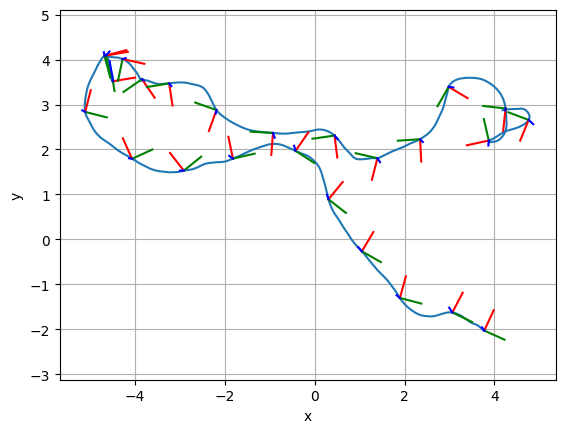

In [32]:
pose_data.plot2d(t0=pose_data.t0+30, tf=pose_data.t0+80)
pose_data.plot2d(t0=pose_data.t0+30, tf=pose_data.t0+80, trajectory=False, pose=True, dt=2.0, axis_len=0.5)